<a href="https://colab.research.google.com/github/yaroslavzabavchuk/Python-Project/blob/main/Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# Setting Google Cloud Project ID
project_id = 'data-analytics-mate'

In [ ]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Create a BigQuery client
client = bigquery.Client(project=project_id)

In [ ]:
query = """
SELECT
s.date as date,
s.ga_session_id,
sp.continent,
sp.country,
sp.device,
sp.browser,
sp.mobile_model_name,
sp.operating_system,
sp.language,
sp.medium as source_traffic_info,
sp.channel,
acs.account_id,
acc.is_verified,
acc.is_unsubscribed,
p.category,
p.name,
p.price,
p.short_description


FROM `DA.session` s
LEFT JOIN `DA.account_session` acs
ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` acc
ON acs.account_id = acc.id
LEFT JOIN `DA.session_params` sp
ON sp.ga_session_id = s.ga_session_id
LEFT JOIN `DA.order` o
ON s.ga_session_id = o.ga_session_id
LEFT JOIN `DA.product` p
ON o.item_id = p.item_id


"""
query_job = client.query(query)
results = query_job.result()
df = query_job.to_dataframe()

In [ ]:
df

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,source_traffic_info,channel,account_id,is_verified,is_unsubscribed,category,name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,organic,Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(none),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349540,2021-01-31,5756982967,Europe,Ukraine,desktop,Firefox,Firefox,Windows,en-us,referral,Social Search,<NA>,<NA>,<NA>,None,None,NaN,None
349541,2021-01-31,464560636,Americas,United States,desktop,Edge,Edge,Web,en-us,organic,Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
349542,2021-01-31,6336117447,Americas,United States,desktop,Chrome,Chrome,Web,en-us,(none),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
349543,2021-01-31,4958826563,Asia,India,mobile,Safari,iPhone,iOS,de,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None


In [ ]:
#Finding total number of columns
total_columns = df.shape[1]
print(f"Total number of columns: {total_columns}")

#Defining column types
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
date_columns = df.select_dtypes(include=['datetime64']).columns

# If the 'date' column is not in datetime format, convert it
if 'date' in df.columns and df['date'].dtype != 'datetime64[ns]':
    df['date'] = pd.to_datetime(df['date'])
    date_columns = ['date']

print(f"Numeric columns: ({len(numeric_columns)}): {numeric_columns}")
print(f"Category columns: ({len(categorical_columns)}): {categorical_columns}")
print(f"Date columns: ({len(date_columns)}): {date_columns}")

# Number of unique sessions
unique_sessions = df['ga_session_id'].nunique()
print(f"Number of unique sessions: {unique_sessions}")

# Time period
start_date = df['date'].min()
end_date = df['date'].max()
print(f"Time period: {start_date} to {end_date}")

#Checking for the missing values
missing_values = df.isnull().sum()
total_missing_values = missing_values.sum()
print(f"Total missing values: {total_missing_values}")

# Columns with the most missing values
missing_percentage = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
print(f"Columns with the most missing values:\n{missing_percentage}")


Total number of columns: 18
Numeric columns: (5): Index(['ga_session_id', 'account_id', 'is_verified', 'is_unsubscribed',
       'price'],
      dtype='object')
Category columns: (12): Index(['continent', 'country', 'device', 'browser', 'mobile_model_name',
       'operating_system', 'language', 'source_traffic_info', 'channel',
       'category', 'name', 'short_description'],
      dtype='object')
Date columns: (1): ['date']
Number of unique sessions: 349545
Time period: 2020-11-01 00:00:00 to 2021-01-31 00:00:00
Total missing values: 2343094
Columns with the most missing values:
is_unsubscribed        92.005321
is_verified            92.005321
account_id             92.005321
short_description      90.405241
name                   90.405241
category               90.405241
price                  90.405241
language               32.689925
ga_session_id           0.000000
date                    0.000000
source_traffic_info     0.000000
operating_system        0.000000
mobile_model_nam

# Table analysis

Our dataset conatins following values:


1.   Total number of columns: **18**
2.   Numeric columns: **5**  ('id', 'account_id', 'is_verified', 'is_unsubscribed', 'price')
3.   Category columns: **12**  ('continent', 'country', 'device', 'browser', 'device_name', 'operating_system', 'language', 'info_traffic_source','traffic_channel', 'category', 'name', 'short_description')
4.   Date column: **1**
5.   Number of unique sessions: **349545**
6.   Time period : **2020-11-01** till **2021-01-31**
7.   Total missing values: **2343094**
8.   Columns with the most missing values:
        *   is_unsubscribed - 92%      
        *   is_verified - 92%           
        *   account_id - 92%             
        *   short_description - 90%       
        *   name - 90%                   
        *   category - 90%                
        *   price - 90%

# Missing Values Analysis:
The dataset contains 2,343,094 missing values, with the highest proportions in:

is_unsubscribed and is_verified (92% missing): Likely due to the absence of user registration or subscription status for most sessions.

account_id (92% missing): Indicates that the majority of sessions are from non-registered users.

short_description, name, category, and price (90% missing): These gaps align with sessions lacking transactional activity, as these columns are populated only when a product is selected or purchased.                   
           


# Top Continents and Countries by Sales and Orders

Top-3 Continents by Total Sales

In [ ]:

#Total sales by continents
total_sales_by_continent = df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3)
print("Top 3 continents by total sales:")
print(total_sales_by_continent)


#Total orders by continents
total_orders_by_continent = df.groupby('continent')['ga_session_id'].count().sort_values(ascending=False).head(3)
print("\nTop 3 continents by total orders:")
print(total_orders_by_continent)

Top 3 continents by total sales:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

Top 3 continents by total orders:
continent
Americas    193179
Asia         83113
Europe       65135
Name: ga_session_id, dtype: Int64


Top-5 countries by Total Sales


In [ ]:
#Total sales by countries
total_sales_by_country = df.groupby('country')['price'].sum().sort_values(ascending=False).head(5)
print("Top 5 countries by total sales:")
print(total_sales_by_country)

#Total orders by countries
total_orders_by_country = df.groupby('country')['ga_session_id'].count().sort_values(ascending=False).head(5)
print("\nTop 5 countries by total orders:")
print(total_orders_by_country)

Top 5 countries by total sales:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64

Top 5 countries by total orders:
country
United States     153470
India              32763
Canada             25994
United Kingdom     11003
France              6958
Name: ga_session_id, dtype: Int64


# Data visualization

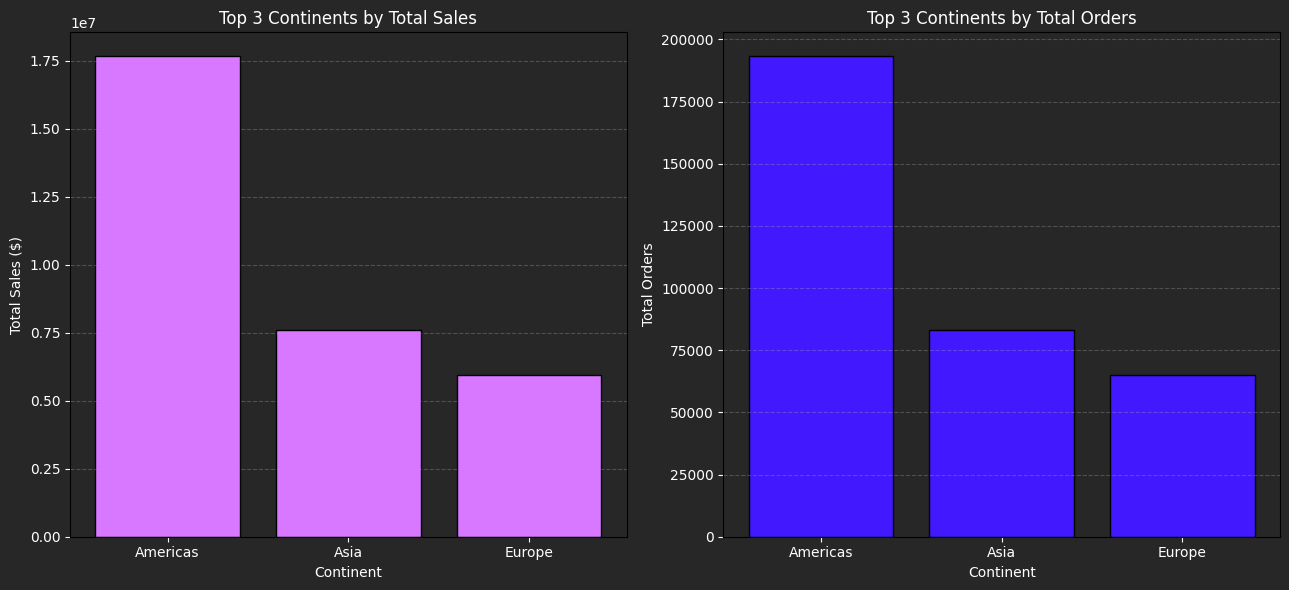

In [ ]:
# Visualization top continents and countries

# Creating a figure with 1 row and 2 columns of subplot
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

fig.set_facecolor('#282728')
#First subplot
ax[0].bar(total_sales_by_continent.index, total_sales_by_continent.values, color='#d877ff', edgecolor='black')
ax[0].set_xlabel('Continent', color = "white")
ax[0].set_ylabel('Total Sales ($)', color = "white")
ax[0].set_title('Top 3 Continents by Total Sales', color = "white")
ax[0].set_facecolor('#282728')
ax[0].tick_params(axis='x', colors='White')
ax[0].tick_params(axis='y', colors='White')
ax[0].grid(True, axis='y', linestyle='--', alpha=0.3)

#Second subplot
ax[1].bar(total_orders_by_continent.index, total_orders_by_continent.values, color='#4218fe', edgecolor='black')
ax[1].set_xlabel('Continent', color = "white")
ax[1].set_ylabel('Total Orders', color = "white")
ax[1].set_title('Top 3 Continents by Total Orders', color = "white")
ax[1].set_facecolor('#282728')
ax[1].tick_params(axis='x', colors='White')
ax[1].tick_params(axis='y', colors='White')
ax[1].grid(True, axis='y', linestyle='--', alpha=0.3)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




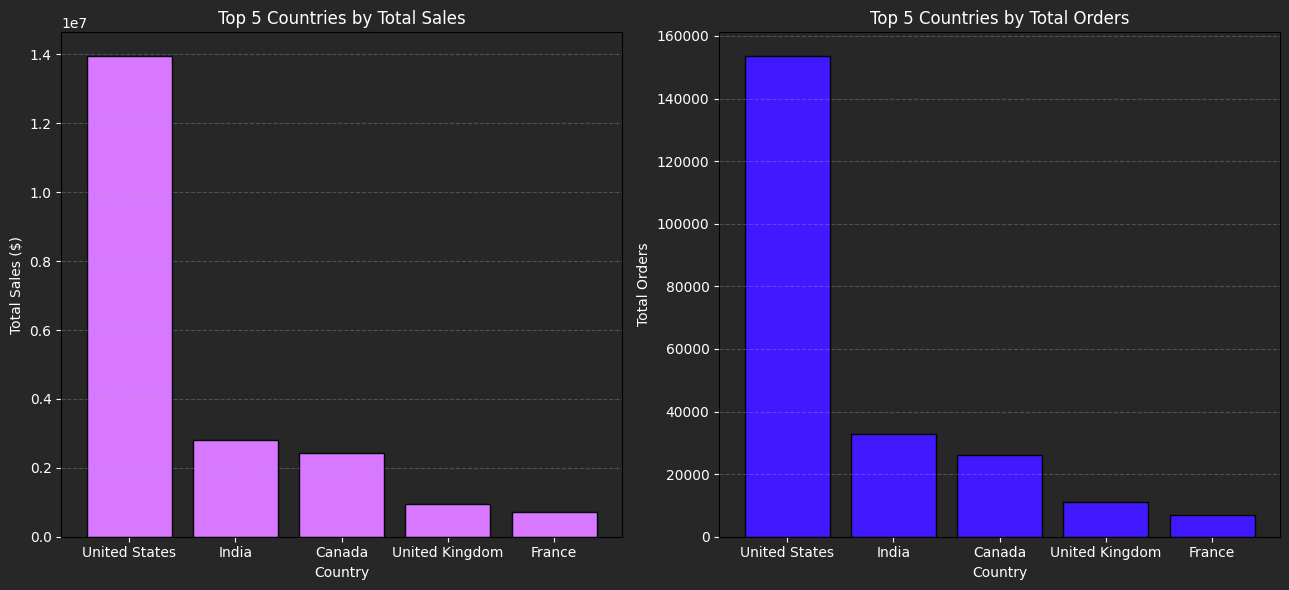

In [ ]:

# Creating a figure with 1 row and 2 columns of subplot
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

fig.set_facecolor('#282728')
#First subplot
ax[0].bar(total_sales_by_country.index, total_sales_by_country.values, color='#d877ff', edgecolor='black')
ax[0].set_xlabel('Country', color = "white")
ax[0].set_ylabel('Total Sales ($)', color = "white")
ax[0].set_title('Top 5 Countries by Total Sales', color = "white")
ax[0].set_facecolor('#282728')
ax[0].tick_params(axis='x', colors='White')
ax[0].tick_params(axis='y', colors='White')
ax[0].grid(True, axis='y', linestyle='--', alpha=0.3)

#Second subplot
ax[1].bar(total_orders_by_country.index, total_orders_by_country.values, color='#4218fe', edgecolor='black')
ax[1].set_xlabel('Country', color = "white")
ax[1].set_ylabel('Total Orders', color = "white")
ax[1].set_title('Top 5 Countries by Total Orders', color = "white")
ax[1].set_facecolor('#282728')
ax[1].tick_params(axis='x', colors='White')
ax[1].tick_params(axis='y', colors='White')
ax[1].grid(True, axis='y', linestyle='--', alpha=0.3)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# What the data tell us?


*  **America**: Americas is the clear leader with sales of 17.7 million and 193,179 orders. **The United States** is the sales leader here with sales of 13.9 million and 153,470 orders. This is a huge part of the regions performance, showing that the US is the heart of the business. This is a market we cannot afford to ignore, with its high volume of both sales and orders indicating strong demand.




*   **Asia**: Asia receives 7.6 million in sales and 83,113 orders, with **India** leading the way with 2.8 million and 32,763 orders. There is a clear opportunity to double down here and meet more of this growing demand.



*   **Europe**: Europe contributed 5.9 million in sales and 65,135 orders, led by the **UK** (938,317.9 million, 11,003 orders) and **France** (710,692.8 million, 6,958 orders). While Europe doesnt match the Americas or Asia in terms of sales, its a solid market with potential for growth.



*   **Canada**: Canada added $2.4 million in sales and 25,994 orders, making it a strong secondary market to the Americas. This is a solid market to watch for further growth.

# Top-10 Categories

In [ ]:
category_sales = df.groupby('category')['price'].sum().sort_values(ascending=False).head(10)
print("Top-10 Categories by Total Sales:")
print(category_sales)

Top-10 Categories by Total Sales:
category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


# Top-10 Categories in the US (Top Country)

In [ ]:
#Top-10 Categories in the US (Top Country)
us_sales = df[df['country'] == 'United States']
us_category_sales = us_sales.groupby('category')['price'].sum().sort_values(ascending=False).head(10)
print("Top-10 Categories in the US:")
print(us_category_sales)

Top-10 Categories in the US:
category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


# Top-10 Product Categories by Global Sales
*   Sofas & armchairs: 8,388,254(USD)
*   Chairs: 6,147,748(USD)
*   Beds: 4,919,725(USD)
*   Bookcases & shelving units: 3,640,818(USD)
*   Cabinets & cupboards: 2,336,499(USD)
*   Outdoor furniture: 2,142,222(USD)
*   Tables & desks: 1,790,307(USD)
*   Chests of drawers & drawer units: 906,562(USD)
*   Bar furniture: 735,503(USD)
*   Children’s furniture: 467,697(USD)

# Top-10 Product Categories in the United States
*  Sofas & armchairs: 3,707,144(USD)
*  Chairs: 2,619,773(USD)
*  Beds: 2,213,058(USD)
*  Bookcases & shelving units: 1,567,606(USD)
*  Cabinets & cupboards: 994,545(USD)
*  Outdoor furniture: 929,245(USD)
*  Tables & desks: 777,865(USD)
*  Chests of drawers & drawer units: 382,388(USD)
*  Bar furniture: 330,805(USD)
*  Children’s furniture: 207,575(USD)

# Visualization

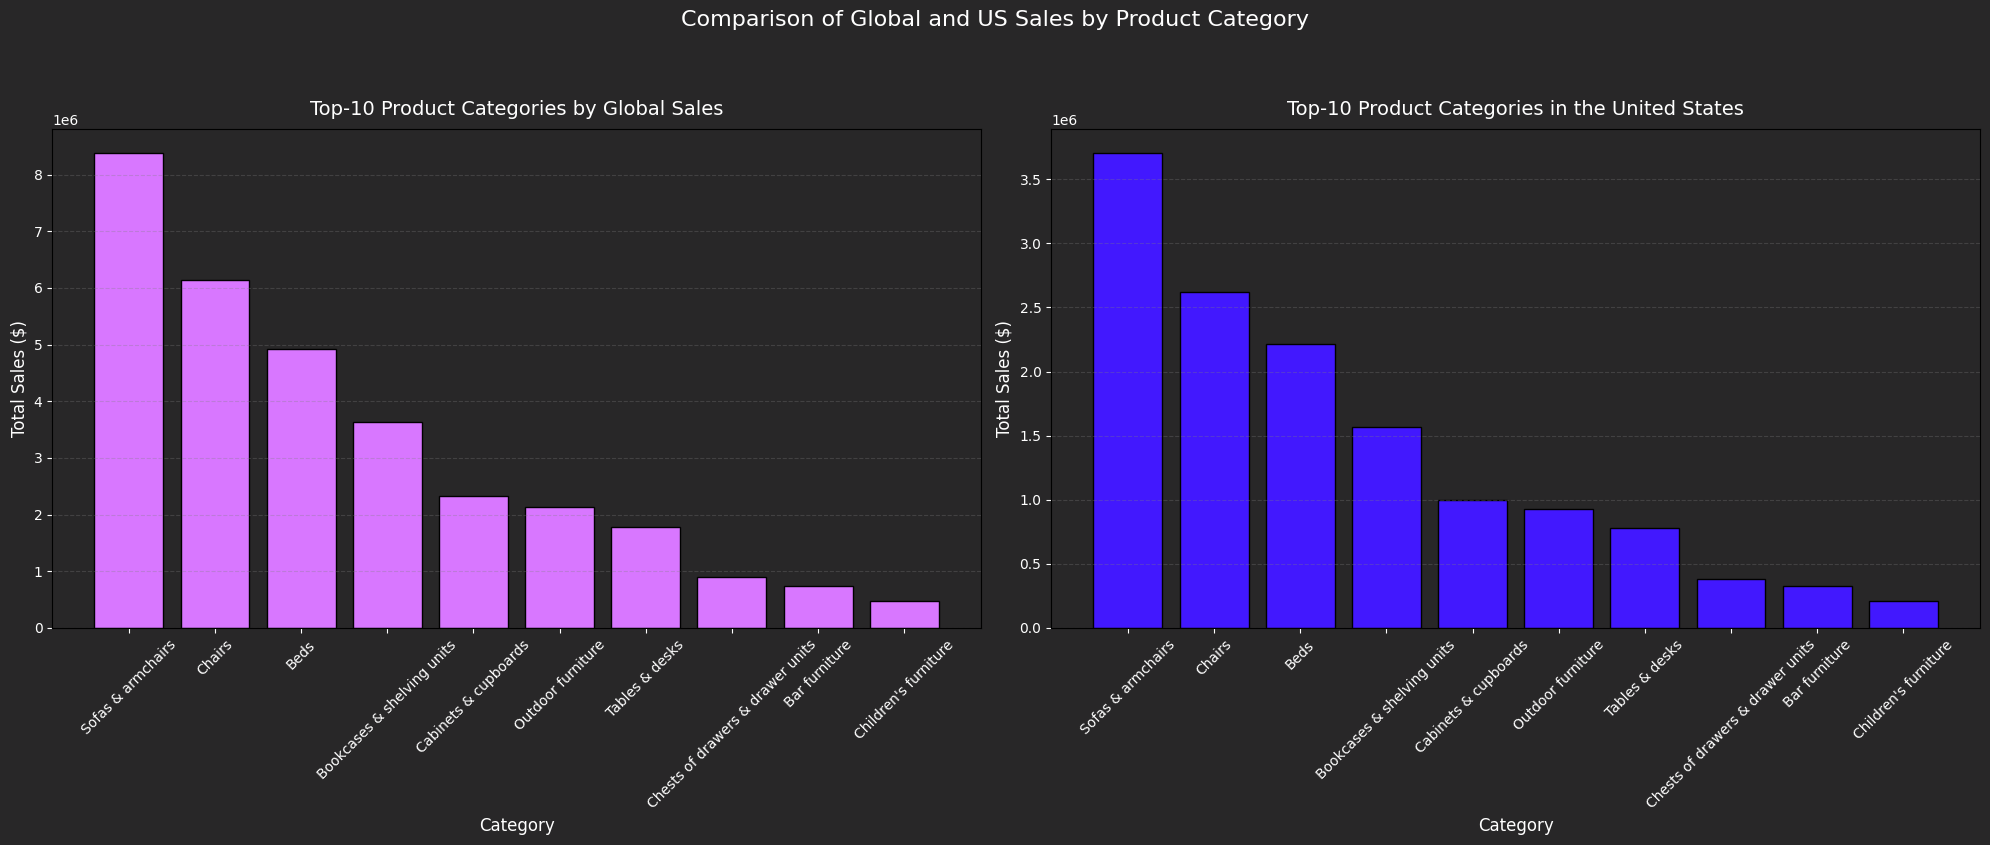

In [ ]:

# Create figure with 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 8), facecolor='#282728')

# Global Sales Subplot
ax[0].bar(category_sales.index, category_sales.values, color='#d877ff', edgecolor='black')
ax[0].set_xlabel('Category', color="White", fontsize=12)
ax[0].set_ylabel('Total Sales ($)', color="White", fontsize=12)
ax[0].set_title('Top-10 Product Categories by Global Sales', color="White", fontsize=14, pad=10)
ax[0].set_facecolor('#282728')
ax[0].tick_params(axis='x', colors='White', rotation=45, labelsize=10)
ax[0].tick_params(axis='y', colors='White', labelsize=10)
ax[0].grid(True, axis='y', linestyle='--', alpha=0.3, color='gray')

# US Sales Subplot
ax[1].bar(us_category_sales.index, us_category_sales.values, color='#4218fe', edgecolor='black')
ax[1].set_xlabel('Category', color='White', fontsize=12)
ax[1].set_ylabel('Total Sales ($)', color='White', fontsize=12)
ax[1].set_title('Top-10 Product Categories in the United States', color='White', fontsize=14, pad=10)
ax[1].set_facecolor('#282728')
ax[1].tick_params(axis='x', colors='White', rotation=45, labelsize=10)
ax[1].tick_params(axis='y', colors='White', labelsize=10)
ax[1].grid(True, axis='y', linestyle='--', alpha=0.3, color='Gray')

# Add a figure title
fig.suptitle('Comparison of Global and US Sales by Product Category', color='White', fontsize=16, y=1.05)

# Adjust layout to prevent overlap and ensure clarity
plt.tight_layout()

# Show the plot
plt.show()


# Insights:

* **Sofas & Armchairs on the top**: Globally, Sofas & armchairs top the charts with 8.39 million in sales, and they also dominate in the US with 3.71 million.
* **Consistent Top Categories**: The top-10 categories are identical globally and in the US, with Sofas & armchairs, Chairs, and Beds holding the top three spots in both markets. This consistency suggests that consumer preferences for core furniture items are aligned, with the US driving a significant portion of global sales (e.g., 44% of Sofas & armchairs sales come from the US).
* **US market**: The US accounts for a substantial share of sales in each category, such as 3.71 million of the 8.39 million in Sofas & armchairs and 2.62 million of the 6.15 million in Chairs. This reinforces the US as a critical market, likely due to its large consumer base and higher purchasing power.
* **Lowest sales in categories**: Categories like Bar furniture (735,503 globally, 330,805 in the US) and Children’s furniture (467,697 globally, 207,575 in the US) have lower sales but indicate niche demand

# Sales by device type

In [ ]:
#total sales
total_sales = df['price'].sum()

#sales by device
device_sales = df.groupby('device')['price'].sum()/total_sales * 100

print("Sales by device type (%)")
print(device_sales)

Sales by device type (%)
device
desktop    59.002245
mobile     38.734924
tablet      2.262831
Name: price, dtype: float64


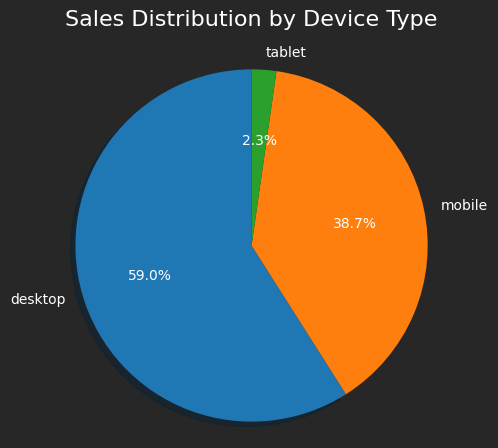

In [ ]:
#Visualization device type

fig, ax = plt.subplots(figsize=(5,5),facecolor='#282728')
ax.set_facecolor('#282728')
wedges, texts, autotexts = ax.pie(
    device_sales,
    labels=device_sales.keys(),
    colors=('#1f77b4', '#ff7f0e', '#2ca02c'),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'color': 'White', 'fontsize': 10}
)
plt.title('Sales Distribution by Device Type', color='White', fontsize=16, pad=20)
ax.axis('equal')
plt.show()

Desktop drives 60% of sales, suggesting users prefer browsing and purchasing on larger screens, possibly due to better product visualization.

# Sales by traffic source

In [ ]:
traffic_sales = df.groupby('channel')['price'].sum() / total_sales * 100
print("Sales by Traffic Source (%):")
print(traffic_sales)

Sales by Traffic Source (%):
channel
Direct            23.442345
Organic Search    35.760189
Paid Search       26.620546
Social Search      7.919827
Undefined          6.257093
Name: price, dtype: float64


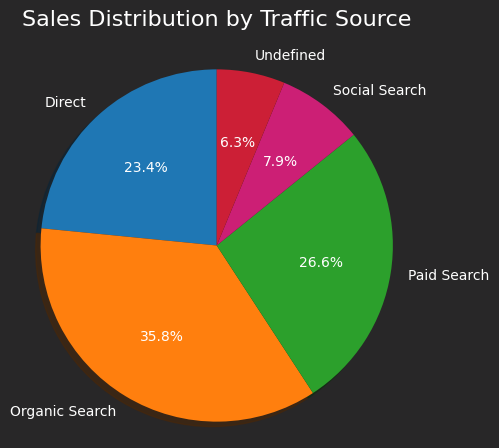

In [ ]:
fig, ax = plt.subplots(figsize=(5,5),facecolor='#282728')
ax.set_facecolor('#282728')
wedges, texts, autotexts = ax.pie(
    traffic_sales,
    labels=traffic_sales.keys(),
    colors=('#1f77b4', '#ff7f0e', '#2ca02c','#cc1f75', '#cc1f36'),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'color': 'White', 'fontsize': 10}
)
plt.title('Sales Distribution by Traffic Source', color='White', fontsize=16, pad=20)
ax.axis('equal')
plt.show()

*  **Direct and Paid Search** are the top traffic sources, contributing 62% of sales, indicating strong brand loyalty and SEO performance.
*  **Organic Search** is effective but less dominant, suggesting room to optimize ad spend.
*  **Social Search** has a smaller share, which could indicate untapped potential in social media marketing.

# Registered Users: Verification and Unsubscription Rates

In [ ]:
unsubscribed_percentage = (df['is_unsubscribed'] == 1).sum() / (df['account_id'].count()) * 100
print(f"Percentage of unsubscribed users among registered users: {unsubscribed_percentage.round(2)}%")

verified_percentage = (df['is_verified'] == 1).sum() / (df['account_id'].count()) * 100
print(f"Percentage of verified users among registered users: {verified_percentage.round(2)}%")

Percentage of unsubscribed users among registered users: 16.94%
Percentage of verified users among registered users: 71.7%


In [ ]:
subscribed_sales = df[df['is_unsubscribed']== 0]['price'].sum()
unsubscribed_sales = df[df['is_unsubscribed']== 1]['price'].sum()
print(f"Sales from subscribed users: ${subscribed_sales.round(2)}")
print(f"Sales from unsubscribed users: ${unsubscribed_sales.round(2)}")

Sales from subscribed users: $2150796.9
Sales from unsubscribed users: $431721.6


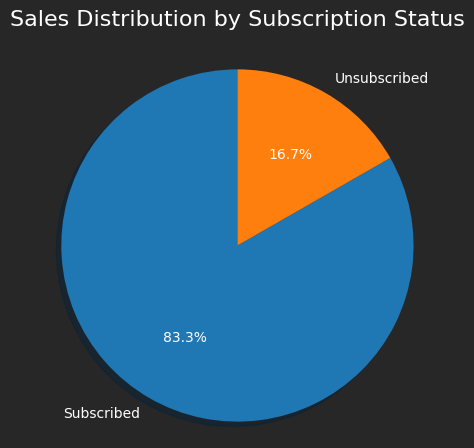

In [ ]:
fig, ax = plt.subplots(figsize=(5,5),facecolor='#282728')
ax.set_facecolor('#282728')
wedges, texts, autotexts = ax.pie(
    [subscribed_sales ,unsubscribed_sales],
    labels=['Subscribed', 'Unsubscribed'],
    colors=('#1f77b4', '#ff7f0e'),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'color': 'White', 'fontsize': 10}
)
plt.title('Sales Distribution by Subscription Status', color='White', fontsize=16, pad=20)
ax.axis('equal')
plt.show()

# Which countries have the most registered users?

In [ ]:
print(f"Top 5 countries with the most registered users:")
print(df.groupby('country')['account_id'].count().sort_values(ascending=False).head(5))
data_by_cnt = df.groupby('country')['account_id'].count().sort_values(ascending=False).head(5)


Top 5 countries with the most registered users:
country
United States     12384
India              2687
Canada             2067
United Kingdom      859
France              553
Name: account_id, dtype: Int64


/tmp/ipython-input-22-3801671110.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country', y = 'registered_users', data = data_by_cnt_df, palette = 'plasma')


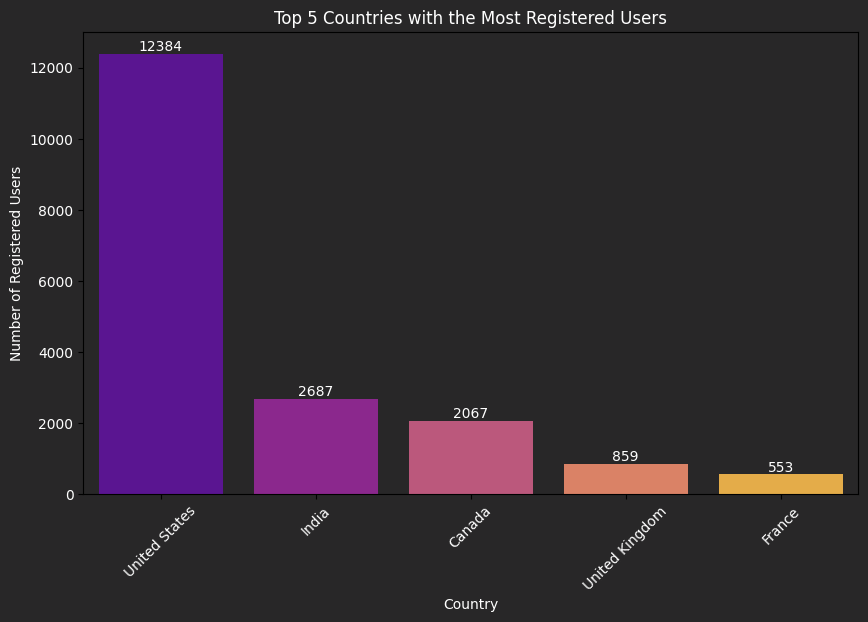

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#282728')
ax.set_facecolor('#282728')
data_by_cnt_df = data_by_cnt.reset_index()
data_by_cnt_df.columns = ['country', 'registered_users']
bars = ax.patches
ax = sns.barplot(x = 'country', y = 'registered_users', data = data_by_cnt_df, palette = 'plasma')
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.0f}', ha='center', va='bottom',color='White')
plt.xlabel('Country',color='White')
plt.ylabel('Number of Registered Users',color='White')
plt.title('Top 5 Countries with the Most Registered Users',color='White')
plt.xticks(rotation=45,color='White')
plt.yticks(color='White')
plt.show()

# Sales Dynamics by Date

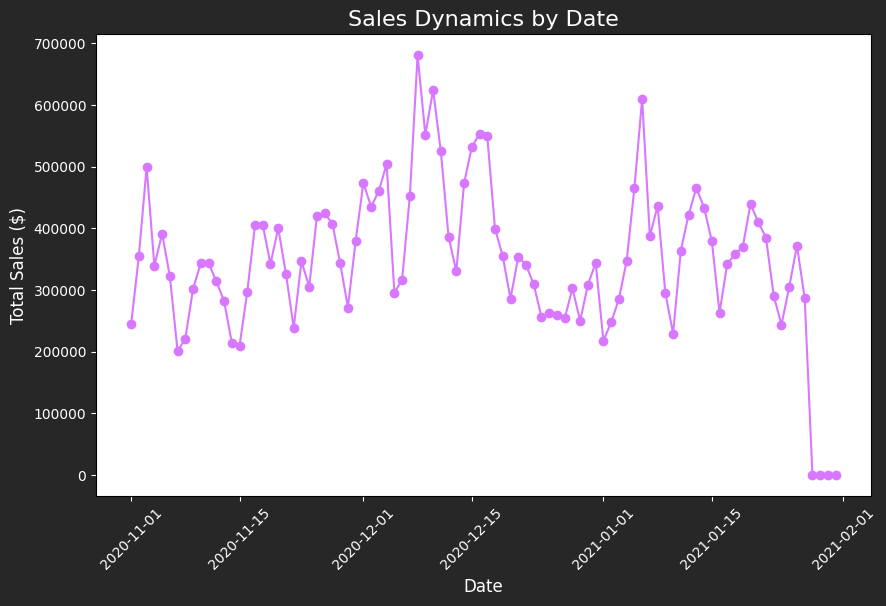

In [ ]:
daily_sales = df.groupby('date')['price'].sum().reset_index()


plt.figure(figsize=(10, 6), facecolor='#282728')
plt.xlabel('Date', color='White', fontsize=12)
plt.ylabel('Total Sales ($)', color='White', fontsize=12)
plt.title('Sales Dynamics by Date', color='White', fontsize=16)
plt.plot(daily_sales['date'], daily_sales['price'], marker='o', linestyle='-', color='#d877ff')
plt.tick_params(axis='x', colors='White', rotation=45, labelsize=10)
plt.tick_params(axis='y', colors='White', labelsize=10)
plt.show()

*  The data spans from Nov 2020 to Jan 2021, so full seasonality (e.g., yearly trends) is hard to assess.
*  However, a spike in December suggests holiday-driven sales (e.g., Christmas/New Year promotions).
*  January shows a slight dip, possibly post-holiday slowdown.

In [ ]:
total_sales_by_continent = df.groupby(['date', 'continent'])['price'].sum().unstack().fillna(0)
print("Total Sales by Continent:")
print(total_sales_by_continent)

Total Sales by Continent:
continent   (not set)  Africa  Americas      Asia   Europe  Oceania
date                                                               
2020-11-01        0.0  1184.0  132002.5   63823.0  46908.0    375.0
2020-11-02       75.0  3781.0  193861.0   79370.0  75710.8   2709.0
2020-11-03      924.0  2063.0  294529.8  126737.8  67692.0   7033.0
2020-11-04      225.0  3637.6  200009.5   66602.0  65915.0   2798.0
2020-11-05       20.0   245.0  182988.2  117608.4  86540.0   3875.0
...               ...     ...       ...       ...      ...      ...
2021-01-27        0.0  1386.0  166735.5   66783.1  48156.1   3280.0
2021-01-28        0.0     0.0       0.0       0.0      0.0      0.0
2021-01-29        0.0     0.0       0.0       0.0      0.0      0.0
2021-01-30        0.0     0.0       0.0       0.0      0.0      0.0
2021-01-31        0.0     0.0       0.0       0.0      0.0      0.0

[92 rows x 6 columns]


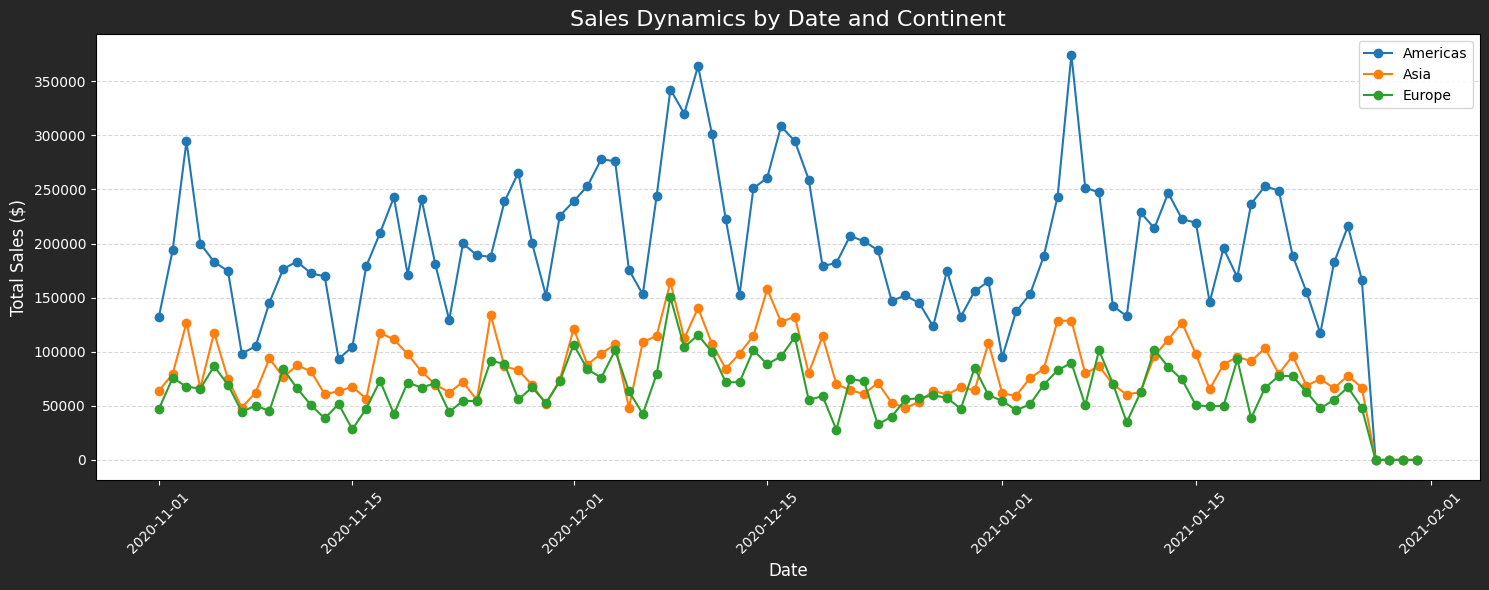

In [ ]:
plt.figure(figsize=(15, 6), facecolor='#282728')
plt.xlabel('Date', color='White', fontsize=12)
plt.ylabel('Total Sales ($)', color='White', fontsize=12)
plt.title('Sales Dynamics by Date and Continent', color='White', fontsize=16)

# Plot sales for each continent
for continent in total_sales_by_continent.columns:
  if continent not in ['Africa','Oceania','(not set)']:
    plt.plot(total_sales_by_continent.index, total_sales_by_continent[continent], marker='o', linestyle='-', label=continent)

plt.tick_params(axis='x', colors='White', rotation=45, labelsize=10)
plt.tick_params(axis='y', colors='White', labelsize=10)
plt.legend(title='Continent', labelcolor='White', loc='upper left')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

**As a result, we see that the graph of individual sales in the Americas, Asia, and Europe has clear recurring peaks and troughs, which may indicate seasonal or cyclical buyer behavior that is not visible in the graph of overall sales.**

# Sales Dynamics by Traffic Channel

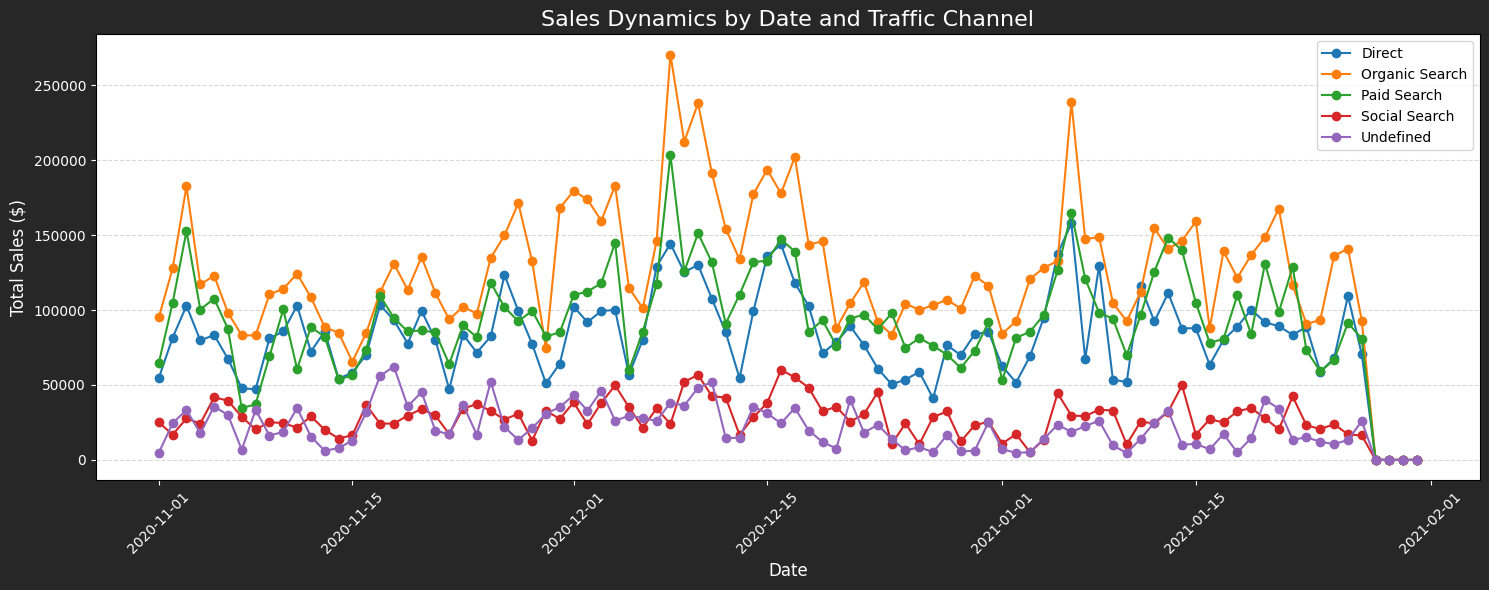

In [ ]:
sales_by_channels = df.groupby(['date','channel'])['price'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 6), facecolor='#282728')
plt.xlabel('Date', color='White', fontsize=12)
plt.ylabel('Total Sales ($)', color='White', fontsize=12)
plt.title('Sales Dynamics by Date and Traffic Channel', color='White', fontsize=16)

# Plot sales for each
for channel in sales_by_channels.columns:
    plt.plot(sales_by_channels.index, sales_by_channels[channel], marker='o', linestyle='-', label=channel)

plt.tick_params(axis='x', colors='White', rotation=45, labelsize=10)
plt.tick_params(axis='y', colors='White', labelsize=10)
plt.legend(title='Traffic Channel', labelcolor='White', loc='upper left')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

# Sales Dynamics by Device Type

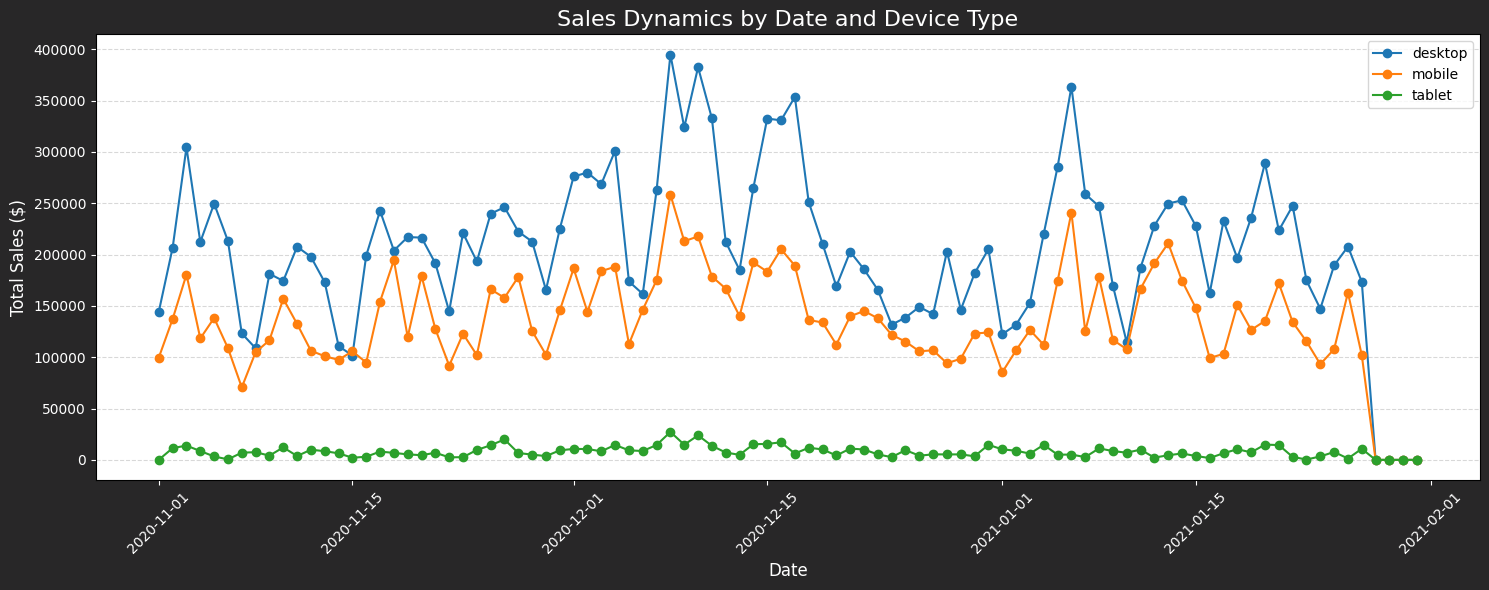

In [ ]:
sales_by_device = df.groupby(['date','device'])['price'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 6), facecolor='#282728')
plt.xlabel('Date', color='White', fontsize=12)
plt.ylabel('Total Sales ($)', color='White', fontsize=12)
plt.title('Sales Dynamics by Date and Device Type', color='White', fontsize=16)

# Plot sales for each
for channel in sales_by_device.columns:
    plt.plot(sales_by_device.index, sales_by_device[channel], marker='o', linestyle='-', label=channel)

plt.tick_params(axis='x', colors='White', rotation=45, labelsize=10)
plt.tick_params(axis='y', colors='White', labelsize=10)
plt.legend(title='Device Type', labelcolor='White', loc='upper left')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

* Total Sales: Likely peaks in late November and December, suggesting holiday-driven seasonality.
* Continents: Americas probably leads, with Europe and Asia following. Regional events (e.g., Black Friday) drive spikes.
* Channels: Organic and Paid Search are key drivers; Direct traffic spikes during campaigns.
* Devices: Desktop likely has higher sales, but mobile is catching up, especially during promotions.

# Sessions by Traffic Channel and Device Type

In [ ]:
# Pivot table for sessions
pivot_sessions = df.pivot_table(index='channel', columns='device', values='ga_session_id', aggfunc='count', fill_value=0)
print(pivot_sessions)

device          desktop  mobile  tablet
channel                                
Direct            47825   31745    1812
Organic Search    72622   49014    2789
Paid Search       55167   37034    2140
Social Search     16288   10988     638
Undefined         12527    8486     470


# Total Sales by Top-10 Categories and Top-5 Countries
Identify top-5 countries and top-10 categories by sales, then create a pivot table.

In [ ]:
# Top-5 countries by sales
top_countries = df.groupby('country')['price'].sum().nlargest(5).index
# Top-10 categories by sales
top_categories = df.groupby('category')['price'].sum().nlargest(10).index

# Filter data
filtered_sales = df[df['country'].isin(top_countries) & df['category'].isin(top_categories)]

# Pivot table
pivot_sales = filtered_sales.pivot_table(index='category', columns='country', values='price', aggfunc='sum', fill_value=0)
print(pivot_sales)

country                             Canada    France     India  \
category                                                         
Bar furniture                      51724.0   11199.0   57657.0   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Chairs                            417740.8  134029.4  544309.2   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Children's furniture               30264.0   14258.0   39177.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Sofas & armchairs                 692427.5  187735.0  788430.0   
Tables & desks                    132678.0   42299.0  186157.5   

country                           United Kingdom  United States  
category                                                         
Bar furniture                            22103.0       330805.0  
Beds     

# Sales by Continent and Device

In [ ]:
pivot_continent_device = df.pivot_table(index='continent', columns='device', values='price', aggfunc='sum', fill_value=0)
print(pivot_continent_device)

device        desktop     mobile    tablet
continent                                 
(not set)     51643.4    22354.0      70.0
Africa       193643.2   130677.8    6910.0
Americas   10497307.4  6780364.3  387608.3
Asia        4381094.4  3028054.4  192149.5
Europe      3493992.9  2311532.8  129098.5
Oceania      246357.7   111242.5    7630.0


# Statistical Analysis of Relationships
Sessions vs. Sales by Date

Calculate sessions and sales per date, visualize, and compute correlation.

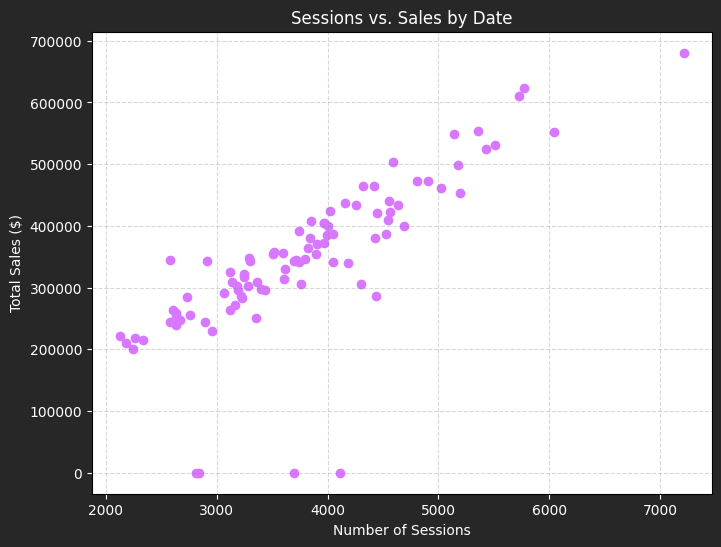

Pearson Correlation: 0.791, P-value: 0.000


In [ ]:
from scipy import stats

# Sessions per date
sessions_by_date = df.groupby('date')['ga_session_id'].count().reset_index()
# Merge with sales
sessions_sales = sessions_by_date.merge(daily_sales, on='date')

# Scatter plot
plt.figure(figsize=(8, 6), facecolor='#282728')
plt.scatter(sessions_sales['ga_session_id'], sessions_sales['price'], color='#d877ff')
plt.title('Sessions vs. Sales by Date', color='White')
plt.xlabel('Number of Sessions', color='White')
plt.ylabel('Total Sales ($)', color='White')
plt.tick_params(axis='x', colors='White')
plt.tick_params(axis='y', colors='White')
plt.grid(True, axis='both', linestyle='--', alpha=0.3, color='gray')
plt.show()

# Correlation
corr, p_value = stats.pearsonr(sessions_sales['ga_session_id'], sessions_sales['price'])
print(f"Pearson Correlation: {corr:.3f}, P-value: {p_value:.3f}")

Correlation (0.791): This is a strong positive correlation, meaning more sessions are tightly linked to higher sales. It’s not perfect (1.0), but it’s close enough to say sessions are a big driver of revenue. Like, when more people show up, they’re definitely buying!


P-value (0.000): This is as significant as it gets (way below 0.05). The chance this correlation happened by random luck is basically zero.

# Sales Correlation Across Top-3 Continents

In [ ]:
# Pivot sales by continent
sales_by_continent = df.groupby(['date', 'continent'])['price'].sum().unstack().fillna(0)
top_continents = sales_by_continent[['Americas', 'Europe', 'Asia']]

# Pairwise correlations
corr_matrix = top_continents.corr()
print("Correlation Matrix:\n", corr_matrix)

# Statistical significance
for col1 in top_continents.columns:
    for col2 in top_continents.columns:
        if col1 < col2:
            corr, p_value = stats.pearsonr(top_continents[col1], top_continents[col2])
            print(f"{col1} vs {col2}: Corr = {corr:.3f}, P-value = {p_value:.3f}")

Correlation Matrix:
 continent  Americas    Europe      Asia
continent                              
Americas   1.000000  0.770586  0.792025
Europe     0.770586  1.000000  0.768427
Asia       0.792025  0.768427  1.000000
Americas vs Europe: Corr = 0.771, P-value = 0.000
Americas vs Asia: Corr = 0.792, P-value = 0.000
Asia vs Europe: Corr = 0.768, P-value = 0.000


**Strong Positive Correlations:**

* All correlations are around 0.77–0.79, which is strong! This means sales in
Americas, Europe, and Asia tend to move together. When sales spike in one continent, they’re likely spiking in the others too.


* The strongest link is Americas vs. Asia (0.792), suggesting these markets might share similar trends.


* Asia vs. Europe (0.768) and Americas vs. Europe (0.771) are slightly weaker but still super tight.


**Statistical Significance (P-value = 0.000):**

Every p-value is essentially zero, way below the 0.05 threshold. This means these correlations are highly significant.

# Sales Correlation Across Top-5 Categories

In [ ]:
# Top-5 categories
top_categories = df.groupby('category')['price'].sum().nlargest(5).index
sales_by_category = df[df['category'].isin(top_categories)].pivot_table(index='date', columns='category', values='price', aggfunc='sum', fill_value=0)

# Correlations
corr_matrix = sales_by_category.corr()
print("Correlation Matrix:\n", corr_matrix)

# Significance
for col1 in sales_by_category.columns:
    for col2 in sales_by_category.columns:
        if col1 < col2:
            corr, p_value = stats.pearsonr(sales_by_category[col1], sales_by_category[col2])
            print(f"{col1} vs {col2}: Corr = {corr:.3f}, P-value = {p_value:.3f}")

Correlation Matrix:
 category                        Beds  Bookcases & shelving units  \
category                                                           
Beds                        1.000000                    0.592913   
Bookcases & shelving units  0.592913                    1.000000   
Cabinets & cupboards        0.514609                    0.539428   
Chairs                      0.554500                    0.637090   
Sofas & armchairs           0.535378                    0.666194   

category                    Cabinets & cupboards    Chairs  Sofas & armchairs  
category                                                                       
Beds                                    0.514609  0.554500           0.535378  
Bookcases & shelving units              0.539428  0.637090           0.666194  
Cabinets & cupboards                    1.000000  0.572870           0.657563  
Chairs                                  0.572870  1.000000           0.578248  
Sofas & armchairs     

All categories have positive correlations (0.515–0.666), meaning when sales of one category go up, the others tend to follow. This suggests customers might be buying these items together or during similar shopping periods.

# Statistical Analysis of Group Differences

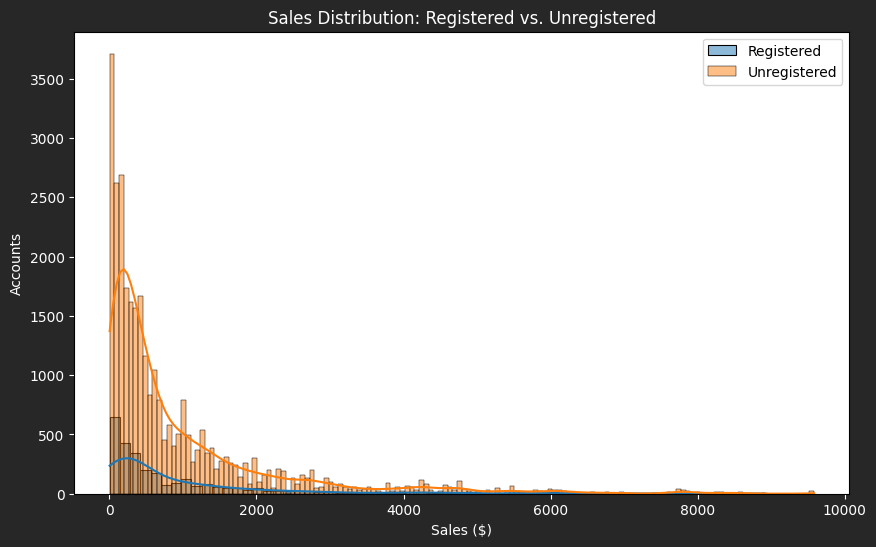

Mann-Whitney U: Stat = 41771375.000, P-value = 0.042


In [ ]:


# Registered vs. unregistered
registered = df[df['account_id'].notna()]['price']
unregistered = df[df['account_id'].isna()]['price']

# Check distributions
plt.figure(figsize=(10, 6),facecolor='#282728')
sns.histplot(registered.dropna(), label='Registered', color='#1f77b4', kde=True)
sns.histplot(unregistered.dropna(), label='Unregistered', color='#ff7f0e', kde=True)
plt.title('Sales Distribution: Registered vs. Unregistered', color='White')
plt.xlabel('Sales ($)', color='White')
plt.ylabel('Accounts', color='White')
plt.legend(labelcolor='White')
plt.legend()
plt.tick_params(axis='x', colors='White')
plt.tick_params(axis='y', colors='White')
plt.show()

# Mann-Whitney U test
# Drop NaN values before performing the statistical test
registered_cleaned = registered.dropna()
unregistered_cleaned = unregistered.dropna()

stat, p_value = stats.mannwhitneyu(registered_cleaned, unregistered_cleaned)
print(f"Mann-Whitney U: Stat = {stat:.3f}, P-value = {p_value:.3f}")

* Significant Difference: The p-value of 0.042 tells us registered and unregistered users have different sales patterns. Based on the Mann-Whitney U test, one group likely has higher sales (or higher-ranked sales values) than the other.


# [Tableau Visualisation](https://public.tableau.com/views/Portfolio_17534521452540/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)